# Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df['smoker'] = [bool(sm =='yes') for sm in df['smoker']]
df['sex_male'] = [bool(sm =='yes') for sm in df['sex']]

In [5]:
df['smoker'].head()

0     True
1    False
2    False
3    False
4    False
Name: smoker, dtype: bool

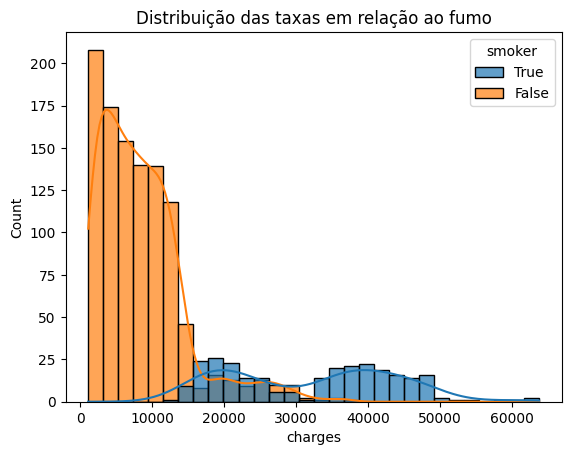

In [6]:
sns.histplot(df, x='charges', hue='smoker', kde=True, hue_order=[True, False], alpha=.7)
plt.title('Distribuição das taxas em relação ao fumo')
plt.show()

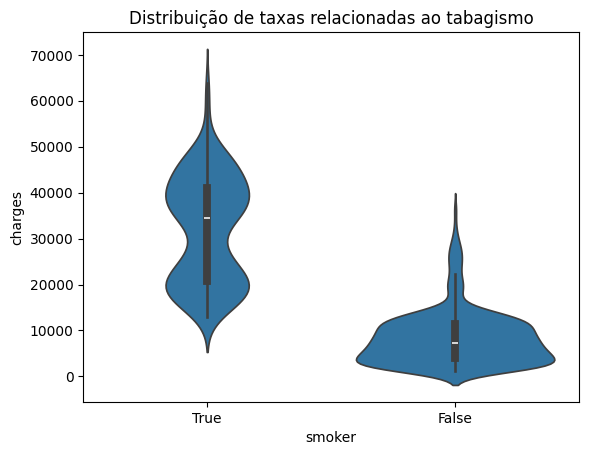

In [7]:
sns.violinplot(data=df, y='charges', x='smoker', order=[True, False])
plt.title('Distribuição de taxas relacionadas ao tabagismo')
plt.show()

In [8]:
df['charges/age'] = df['charges'] - df['age']*200

In [9]:
from sklearn.cluster import KMeans

In [10]:
X = np.array(df[['charges/age']])
modelo = KMeans(n_clusters=3, max_iter=500, init=np.array([16000, 28000, 48000]).reshape(-1, 1), n_init=1)
modelo = modelo.fit(X.reshape(-1, 1))

In [11]:
df['cluster'] = modelo.labels_

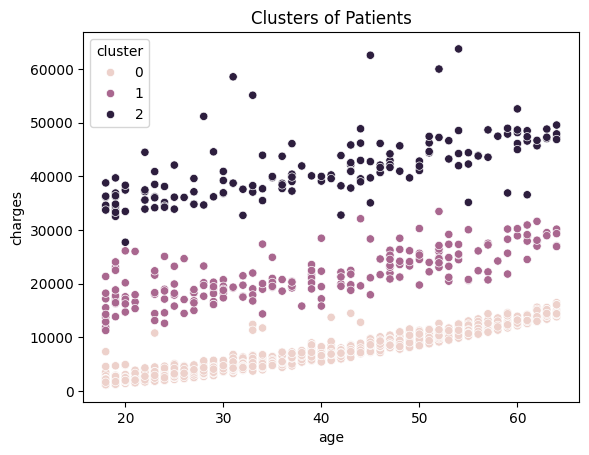

In [12]:
sns.scatterplot(data=df, x='age', y='charges', hue='cluster')
plt.title('Clusters of Patients')
plt.show()

In [13]:
# ...existing code...

df.to_csv('arquivo_pbi.csv', index=False)

# ...existing code...

# Regressão

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [20]:
X = df[['age', 'bmi', 'smoker','children', 'sex_male']]

In [21]:
y = df['charges']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [23]:
modelo.intercept_, modelo.coef_


(np.float64(-12117.075074107726),
 array([  257.07115795,   327.52263109, 23653.21164629,   427.19997095,
            0.        ]))

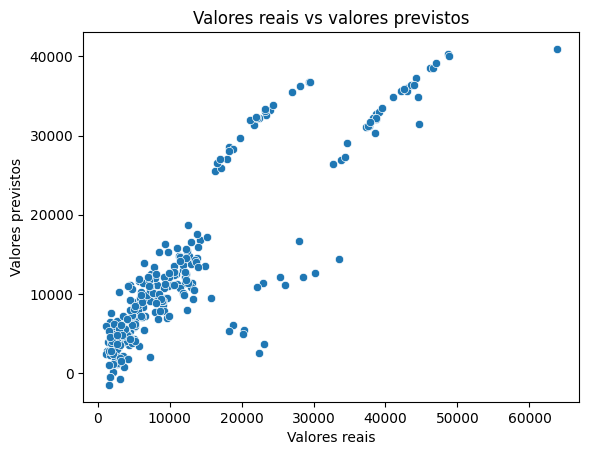

MSE: 33981653.95019776
R2: 0.7811147722517886


In [24]:
y_pred = modelo.predict(X_test)
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Valores reais')
plt.ylabel('Valores previstos')
plt.title('Valores reais vs valores previstos')
plt.show()
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

# Classificação

In [29]:
y = df['cluster']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression


In [31]:
# Create a logistic regression model
modelo = LogisticRegression(random_state=42)

# Fit the model to the training data
modelo.fit(X_train, y_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [32]:
# Evaluate the model
y_pred = modelo.predict(X_test)
print('Acurácia:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Acurácia: 0.9291044776119403
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       199
           1       0.91      0.55      0.69        38
           2       0.94      0.94      0.94        31

    accuracy                           0.93       268
   macro avg       0.93      0.83      0.86       268
weighted avg       0.93      0.93      0.92       268

